In [32]:
# Numpy
import numpy as np

#  Sparse matrix tools
from scipy.sparse import csc_matrix
from scipy.sparse import spdiags, eye
from scipy.sparse.linalg import spsolve

#  Banded solver
from scipy.linalg import solve_banded

#  For diagnostics
from scipy.interpolate import CubicSpline

#  Plotting stuff
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
N = 100
x = np.linspace(0, np.pi/2, N)
Delta = np.diff(x); Delta = Delta[0]

knowns = np.zeros(x.size)
knowns[0] = 1
knowns[-1] = 0

# solve_banded

We will look at the linear equation,

$$\frac{d^2 y}{dx^2} + y = 0,$$

subject to $y(0) = 1$, and $y(\pi/2) = 0$.


For example,
$$
\begin{align*}
y_1 & = & 1 \\
\frac{y_1 -2y_2 + y_3}{\Delta^2} + y_2  &= & 0 \\
\frac{y_2 -2y_3 + y_4}{\Delta^2} + y_3  &= & 0 \\
\frac{y_3 -2y_4 + y_5}{\Delta^2} + y_4  &= & 0 \\
\frac{y_4 -2y_5 + y_6}{\Delta^2} + y_5  &= & 0 \\
y_6 & = & 0 
\end{align*}
$$

Or in matrix form,

$$
\frac{1}{\Delta^2}
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 & 0 \\
0 & 0 & 1 & -2 & 1 & 0  \\
0 & 0 & 0 & 1 & -2 & 1  \\
0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix} 
\begin{pmatrix}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5 \\
y_6
\end{pmatrix}+ 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5 \\
y_6
\end{pmatrix}= 
\begin{pmatrix}
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{pmatrix}
$$


Factoring out the column vector,
$$
\left[
\frac{1}{\Delta^2}
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 & 0 \\
0 & 0 & 1 & -2 & 1 & 0  \\
0 & 0 & 0 & 1 & -2 & 1  \\
0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix} 
+ 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix} \right]\quad
\begin{pmatrix}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5 \\
y_6
\end{pmatrix}= 
\begin{pmatrix}
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{pmatrix}
$$

Text(0, 0.5, 'y')

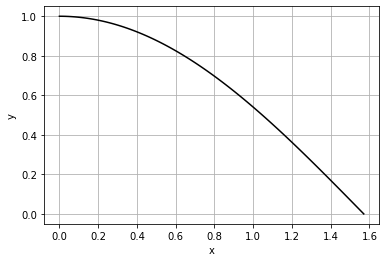

In [34]:
LU = (1, 1)

upper = np.ones( (N, )) / Delta **2
main = -2 / Delta**2 * np.ones( (N, ) ) + 1
lower = np.ones( (N, )) / Delta **2

main[0] = 1
main[-1] = 1

upper[0] = 0; upper[1] = 0
lower[-1] = 0; lower[-2] = 0

ab = [upper, main, lower]

y = solve_banded(LU, ab, knowns)

plt.plot(x, y, 'k')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

# Forward Difference

We will look at the linear equation,

$$\frac{d^2 y}{dx^2} + y = 0,$$

subject to $y(0) = 1$, and $y(\pi/2) = 0$.

## Central Difference Formula

With the central difference formula, the second derivative at the $i$th point is estimated using the point in question ($i$th) the the ones immediately behind and ahead (the $i-1$ point and the $i+1$ point).  See the equations below.

$$\frac{d^2y}{dx^2} \approx \frac{y_{i-1} -2y_i + y_{i+1}}{\Delta^2}$$

Our system of equations was,
$$
\begin{align*}
y_1 & = & 1 \\
\frac{y_1 -2y_2 + y_3}{\Delta^2} + y_2  &= & 0 \\
\frac{y_2 -2y_3 + y_4}{\Delta^2} + y_3  &= & 0 \\
\frac{y_3 -2y_4 + y_5}{\Delta^2} + y_4  &= & 0 \\
\frac{y_4 -2y_5 + y_6}{\Delta^2} + y_5  &= & 0 \\
y_6 & = & 0 
\end{align*}
$$

##  Forward Difference Formula
Our  second derivative approximation is,
$$\frac{d^2y}{dx^2} \approx \frac{y_{i} -2y_{i+1} + y_{i+2}}{\Delta^2}$$

In other words, we are using the points at $i$, $i+1$, and $i+2$.
Our system of equations is,

$$
\begin{align*}
y_1 & = & 1 \\
\frac{y_2 -2y_3 + y_5}{\Delta^2} + y_2  &= & 0 \\
\frac{y_3 -2y_4 + y_5}{\Delta^2} + y_3  &= & 0 \\
\frac{y_4 -2y_5 + y_6}{\Delta^2} + y_4  &= & 0 \\
\frac{y_5 -2y_6 + y_7}{\Delta^2} + y_5  &= & 0 \\
y_6 & = & 0 
\end{align*}
$$

For this problem, note the issue with the second to last equation.  It needs the seventh point which is outside our range.  If one wishes to use this method, this must be addressed.  A second issue is there is no equations that couple the first point to the others.  Again, this needs to be dealt with if one wants to use forward differencing.

In matrix form aside from the fifth line, we have,
$$
\left[
\frac{1}{\Delta^2}
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 & 0 \\
0 & 0 & 1 & -2 & 1 & 0 \\
0 & 0 & 0 & 1 & -2 & 1  \\
0 & 0 & 0 & 0 & 1 & -2  \\
0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix} 
+ 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix} \right]\quad
\begin{pmatrix}
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5 \\
y_6
\end{pmatrix}= 
\begin{pmatrix}
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{pmatrix}
$$

Again, please note that the fifth line in the above left-hand matrix is wrong.

Let's ignore this for the moment and work through the problem so we can see both this issue and the lack of coupling between $y_1$ and the other values of $y$.  We'll sey $N=6$ just as in the text above.

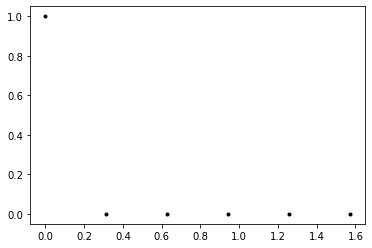

In [37]:
N = 6
x = np.linspace(0, np.pi/2, N)
Delta = np.diff(x); Delta = Delta[0]

temp = [np.ones( x.size), -2 * np.ones(x.size), np.ones( x.size)]
D2 = spdiags(temp, [0, 1, 2], x.size, x.size, format = 'csc')

E = eye(x.size, format = 'csc')

#  Build matrix equation
M = D2/Delta**2 + E
M[0,0] = 1; M[0,1] = 0; M[0, 2] = 0
M[-1, -1] = 1

#  Our vector of knowns
knowns = np.zeros(x.size); knowns[0] = 1; knowns[-1] = -0

#  Solve the system
y = spsolve(M, knowns)
plt.plot(x, y, 'k.')

It is obvious from the plot above that there is an uuse.  Let's use the spy command to visualize what our matrix plloks like.

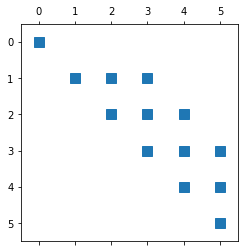

In [36]:
plt.spy(M)

Above, we can quickly see that we are not linking the first with point to the others-- there are no other entries in the first column.  Let's redo this using a central difference formula for the the first row, $(i  = 2)$ and the second to last rown $(i = N-1)$.

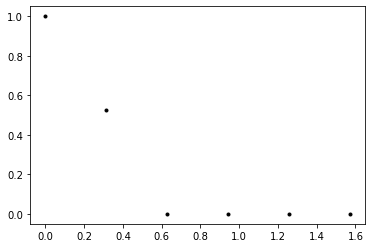

In [38]:
N = 6
x = np.linspace(0, np.pi/2, N)
Delta = np.diff(x); Delta = Delta[0]

temp = [np.ones( x.size), -2 * np.ones(x.size), np.ones( x.size)]
D2 = spdiags(temp, [0, 1, 2], x.size, x.size, format = 'csc')

E = eye(x.size, format = 'csc')

#  Build matrix equation
M = D2/Delta**2 + E
M[0,0] = 1; M[0,1] = 0; M[0, 2] = 0
M[-1, -1] = 1

#  Make second row central difference
M[1,3] = 0
M[1,0] = 1/Delta**2
M[1,1] = -2/Delta**2 + 1
M[1,2] = 1/Delta**2

M[-2, -4] = 0
M[-2, -3] = 1/Delta**2
M[-2, -2] = -2/Delta**2 + 1
M[-2, -1] = 1/Delta**2

#  Vector of knowns
knowns = np.zeros(x.size); knowns[0] = 1; knowns[-1] = -0

#  Solve the system
y = spsolve(M, knowns)
plt.plot(x, y, 'k.')

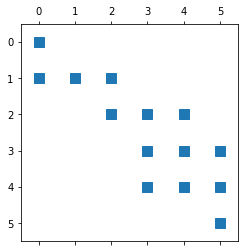

In [39]:
plt.spy(M)

In the video, I said I didn't know why this wasn't working.  It is because now we are not coupling the $i=1$ variable to the others.

In the video I mentioned this almost works with the backwards diferencing method.  This is only true because of the numers used in the problem.  The same issue would arise but in the backwards case, we are not coupling to the second-to-last variable.  See below.

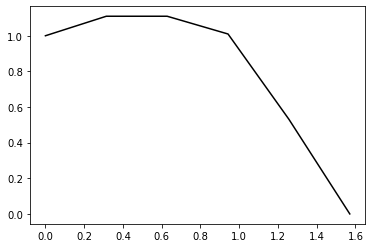

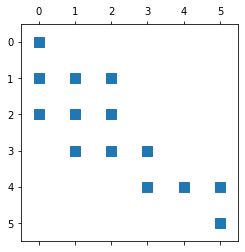

In [40]:
#  Set the number of grid points, define our x-values and working out the grid spacing
N = 6
x = np.linspace(0, np.pi/2, N)
Delta = np.diff(x); Delta = Delta[0]

temp = [np.ones( x.size), -2 * np.ones(x.size), np.ones( x.size)]
D2 = spdiags(temp, [0, -1, -2], x.size, x.size, format = 'csc')

E = eye(x.size, format = 'csc')

#  Build matrix equation
M = D2/Delta**2 + E
M[0,0] = 1; M[0,1] = 0; M[0, 2] = 0
M[-1, -1] = 1

M[-1,-2] = 0
M[-1,-3] = 0

#  Make second row central difference
M[1,3] = 0
M[1,0] = 1/Delta**2
M[1,1] = -2/Delta**2 + 1
M[1,2] = 1/Delta**2

M[-2, -4] = 0
M[-2, -3] = 1/Delta**2
M[-2, -2] = -2/Delta**2 + 1
M[-2, -1] = 1/Delta**2

knowns = np.zeros(x.size); knowns[0] = 1; knowns[-1] = -0

#  Solve the system
y = spsolve(M, knowns)
plt.plot(x, y, 'k')

plt.figure()
plt.spy(M)
#print(y[1])